In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from isocodes import countries

pd.set_option('display.max_columns', 26) # show all columns in the output
sns.set_theme() # seaborn styling
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
df = pd.read_csv('WVS_Cross-National_Wave_7_csv_v6_0.csv',
                 sep=',',
                 usecols=[ # Because the dataset is huge, just import the following columns:
                     "A_YEAR", "B_COUNTRY_ALPHA", "J_INTDATE", # "A_STUDY", "A_WAVE", Metadaten des Interviews für die Auswertung
                     "G_TOWNSIZE", "G_TOWNSIZE2", "H_SETTLEMENT", "H_URBRURAL", # 
                     "Q5", "Q6", "Q7", "Q8", "Q9", "Q43", "Q44", # Social Values, Norms, Stereotypes
                     "Q66", "Q67", "Q75", "Q77", "Q82", # Social Capital, Trust and Organizational Memberships
                     "Q107", "Q108", "Q110", # Economic values
                     "Q122", # Migration
                     "Q235", # ... Political Culture and Political Regimes 
                ],
                dtype={'B_COUNTRY_ALPHA': 'category'} # just overriding this as everything else is correctly detected automatically by Pandas
)
df.rename(columns={
        "A_YEAR": "interview_year",
        "J_INTDATE": "interview_date",
        "B_COUNTRY_ALPHA": "country_iso",
        "G_TOWNSIZE": "townsize",
        "G_TOWNSIZE2": "townsize_2",
        "H_SETTLEMENT": "settlement",
        "H_URBRURAL": "urban_rural"
    },
    inplace=True
)

df.sample(n=10, random_state=2024)

,interview_year,country_iso,interview_date,townsize,townsize_2,settlement,urban_rural,Q5,Q6,Q7,Q8,Q9,Q43,Q44,Q66,Q67,Q75,Q77,Q82,Q107,Q108,Q110,Q122,Q235
17813,2018,CHN,20180807,7,4,4,1,2,3,1,1,1,3,1,2,2,2,2,-4,4,4,5,0,2
35755,2018,IDN,20180604,2,1,5,2,1,1,1,2,2,1,2,3,3,1,3,3,8,7,7,0,4
27223,2022,GBR,20220526,7,4,2,1,2,4,1,2,2,1,1,3,3,1,4,4,5,3,6,2,1
76962,2020,SGP,-4,8,5,1,1,2,1,1,2,1,1,2,3,3,3,3,2,4,5,4,2,1
37488,2023,IND,20230609,6,3,3,1,1,1,1,1,1,3,1,4,4,2,4,2,1,-1,-1,0,-1
72202,2018,PRI,20180803,5,3,4,1,2,1,2,2,1,3,1,3,3,3,3,3,5,5,1,1,4
6214,2018,BGD,20181217,5,3,2,2,1,1,1,2,1,3,1,2,2,1,1,1,5,4,3,2,4
28422,2022,GBR,20220829,7,4,3,1,2,4,2,1,1,1,2,4,4,3,4,3,5,1,5,2,3
69886,2018,PER,20180904,1,1,5,2,1,1,2,2,1,1,1,2,2,2,2,2,7,7,6,0,2
90239,2017,USA,20170502,8,5,3,1,2,3,2,1,1,1,1,3,3,2,3,3,5,1,7,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97220 entries, 0 to 97219
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   interview_year  97220 non-null  int64   
 1   country_iso     97220 non-null  category
 2   interview_date  97220 non-null  int64   
 3   townsize        97220 non-null  int64   
 4   townsize_2      97220 non-null  int64   
 5   settlement      97220 non-null  int64   
 6   urban_rural     97220 non-null  int64   
 7   Q5              97220 non-null  int64   
 8   Q6              97220 non-null  int64   
 9   Q7              97220 non-null  int64   
 10  Q8              97220 non-null  int64   
 11  Q9              97220 non-null  int64   
 12  Q43             97220 non-null  int64   
 13  Q44             97220 non-null  int64   
 14  Q66             97220 non-null  int64   
 15  Q67             97220 non-null  int64   
 16  Q75             97220 non-null  int64   
 17  Q77         

### For further analysis: how many interviews conducted per country?

In [4]:
no_of_interviews_per_country = df.value_counts(subset=["country_iso"]).reset_index() # get answers as DAtaFrame instead of Series

no_of_interviews_per_country["country_name"] = no_of_interviews_per_country.apply(
    lambda x: countries.get(alpha_3=x["country_iso"])["name"] if countries.get(alpha_3=x["country_iso"]) else None,
    axis=1
)
no_of_interviews_per_country

,country_iso,count,country_name
0,CAN,4018,Canada
1,IDN,3200,Indonesia
2,CHN,3036,China
3,GBR,2609,United Kingdom
4,USA,2596,United States
...,...,...,...
61,ARG,1003,Argentina
62,URY,1000,Uruguay
63,CYP,1000,Cyprus
64,CHL,1000,Chile


In [5]:
no_of_interviews_per_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   66 non-null     category
 1   count         66 non-null     int64   
 2   country_name  65 non-null     object  
dtypes: category(1), int64(1), object(1)
memory usage: 3.8+ KB


***
## 1) Economy
### 1.1) Relevant Questions: Q5 and Q43
- **Q5: Important in life: Work.**
    - Current view on the importance of work in the life of the respondent.
    - Possible answers: (1) Very important, (2) Rather important, (3) Not very important, (4) Not at all important
- **Q43: Future changes: Less importance placed on work.**
    - View on a decreasing importance of work in the life of the respondent.
    - Possible answers: (1) Good thing, (2) Don't mind, (3) Bad thing

### 1.2) Hypothesis
The higher a country's GDP per capita, the more importance is attached to work today and in the future.

This would mean: the higher a country's GDP per capita, the lower the values for Q5 and the higher the values for Q43.

### 1.3) Sources
Additional data used for [GDP data][1]:
- [World Bank (2023) – with minor processing by Our World in Data. “GDP per capita – World Bank – In constant 2017 international $” [dataset]. World Bank, “World Bank World Development Indicators” [original data]. Retrieved June 18, 2024 from https://ourworldindata.org/grapher/gdp-per-capita-worldbank][1]

[1]: https://ourworldindata.org/grapher/gdp-per-capita-worldbank

In [6]:
df_gdp_per_capita = pd.read_csv("gdp-per-capita-worldbank.csv",
                 sep=",",
                 names=[
                     "country_name", "country_iso", "year", "gdp_per_capita"
                 ],
                 header=0,
                 dtype={
                     "country_name": "category",
                     "country_iso": "category"
                    } # just overriding this as everything else is correctly detected automatically by Pandas
)
df_gdp_per_capita

,country_name,country_iso,year,gdp_per_capita
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605
3,Afghanistan,AFG,2005,1352.3207
4,Afghanistan,AFG,2006,1366.9932
...,...,...,...,...
6557,Zimbabwe,ZWE,2018,2399.6216
6558,Zimbabwe,ZWE,2019,2203.3967
6559,Zimbabwe,ZWE,2020,1990.3195
6560,Zimbabwe,ZWE,2021,2115.1445


In [7]:
df_gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6562 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6562 non-null   int64   
 3   gdp_per_capita  6562 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 135.5 KB


In [8]:
# There are rows where country_iso is null, so after short look into the CSV,
# Drop rows for regions (e.g. EU) without iso_code
df_gdp_per_capita.dropna(axis=0, inplace=True)
df_gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6133 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6133 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6133 non-null   int64   
 3   gdp_per_capita  6133 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 174.9 KB


In [9]:
# Select most recent data of the dataset (2022)
df_gdp_per_capita = df_gdp_per_capita.loc[df_gdp_per_capita["year"]==2022,:]
df_gdp_per_capita

,country_name,country_iso,year,gdp_per_capita
52,Albania,ALB,2022,15492.0670
85,Algeria,DZA,2022,11198.2330
118,Angola,AGO,2022,5906.1157
151,Antigua and Barbuda,ATG,2022,22321.8700
184,Argentina,ARG,2022,22461.4410
...,...,...,...,...
6429,Vanuatu,VUT,2022,2785.9038
6462,Vietnam,VNM,2022,11396.5310
6495,World,OWID_WRL,2022,17527.1900
6528,Zambia,ZMB,2022,3365.8738


In [182]:
# Answers that have a value of < 0 are of type "Don't know", "No answer", "Not asked" or "Missing / N/A"
# We will exlude them in the further analysis for both relevant questions
valid_answers_filtered_df = df.loc[(df["Q43"] > 0) & (df["Q5"] > 0), :]

In [183]:
# .describe() already offers the mean and std-deviation over all rows
# This is what we need for further analysis
q5_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q5"]
q43_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q43"]
q43_description_df

,count,mean,std,min,25%,50%,75%,max
country_iso,,,,,,,,
AND,999.0,1.801802,0.824692,1.0,1.0,2.0,3.0,3.0
ARG,956.0,2.446653,0.767316,1.0,2.0,3.0,3.0,3.0
ARM,1197.0,2.388471,0.881034,1.0,1.0,3.0,3.0,3.0
AUS,1697.0,1.832057,0.753583,1.0,1.0,2.0,2.0,3.0
BGD,1186.0,2.806914,0.565375,1.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
USA,2565.0,1.941520,0.773294,1.0,1.0,2.0,3.0,3.0
UZB,1199.0,1.782319,0.590821,1.0,1.0,2.0,2.0,3.0
VEN,1190.0,2.562185,0.721471,1.0,2.0,3.0,3.0,3.0


In [184]:
economy_analysis_df = df_gdp_per_capita.join(q5_description_df, on="country_iso", how="inner")
economy_analysis_df = economy_analysis_df.join(q43_description_df, on="country_iso", how="inner", rsuffix="_q43").dropna()
economy_analysis_df.sample(20)

,country_name,country_iso,year,gdp_per_capita,count,mean,std,min,25%,50%,75%,max,count_q43,mean_q43,std_q43,min_q43,25%_q43,50%_q43,75%_q43,max_q43
3511,Macao,MAC,2022,51840.1400,1009.0,1.928642,0.753867,1.0,1.0,2.0,2.0,4.0,1009.0,1.740337,0.745335,1.0,1.0,2.0,2.0,3.0
2774,Iraq,IRQ,2022,9199.0205,1174.0,1.253833,0.594345,1.0,1.0,1.0,1.0,4.0,1174.0,2.396082,0.863596,1.0,1.0,3.0,3.0,3.0
3996,Mongolia,MNG,2022,12073.2450,1638.0,1.724664,0.813307,1.0,1.0,2.0,2.0,4.0,1638.0,1.820513,0.792925,1.0,1.0,2.0,2.0,3.0
1034,Canada,CAN,2022,49296.3800,4018.0,1.994276,0.920119,1.0,1.0,2.0,2.0,4.0,4018.0,1.758337,0.738760,1.0,1.0,2.0,2.0,3.0
4305,Nicaragua,NIC,2022,5822.3535,1200.0,1.336667,0.535625,1.0,1.0,1.0,2.0,4.0,1200.0,2.435833,0.859165,1.0,2.0,3.0,3.0,3.0
4536,Pakistan,PAK,2022,5376.9670,1960.0,1.602041,0.935269,1.0,1.0,1.0,2.0,4.0,1960.0,2.100000,0.905544,1.0,1.0,2.0,3.0,3.0
6297,United States,USA,2022,64623.1250,2565.0,1.857310,0.847078,1.0,1.0,2.0,2.0,4.0,2565.0,1.941520,0.773294,1.0,1.0,2.0,3.0,3.0
6264,United Kingdom,GBR,2022,47587.1680,2511.0,2.100757,1.083286,1.0,1.0,2.0,3.0,4.0,2511.0,1.767822,0.762581,1.0,1.0,2.0,2.0,3.0
4121,Myanmar,MMR,2022,4249.8760,1200.0,1.271667,0.550560,1.0,1.0,1.0,1.0,4.0,1200.0,2.562500,0.791591,1.0,3.0,3.0,3.0,3.0
711,Bolivia,BOL,2022,8244.2350,2019.0,1.252600,0.489318,1.0,1.0,1.0,1.0,4.0,2019.0,2.366518,0.878320,1.0,1.0,3.0,3.0,3.0


In [217]:
# Our analysis focuses on these countries:
selected_countries = [
    "ARG", "USA", "ARM", "UZB", "DEU", "ZWE", "VNM", "GRC", "HKG", "JPN", "CHN"
]

# Checking number of interviews per selected country
no_of_interviews_per_country.loc[no_of_interviews_per_country["country_iso"].isin(selected_countries), :]

,country_iso,count,country_name
2,CHN,3036,China
4,USA,2596,United States
7,HKG,2075,Hong Kong
17,DEU,1528,Germany
22,JPN,1353,Japan
28,UZB,1250,Uzbekistan
33,ARM,1223,Armenia
35,ZWE,1215,Zimbabwe
42,VNM,1200,Viet Nam
48,GRC,1200,Greece


In [216]:
# At least 1003 interviews for all selected countries. This seems good
# Filter data for selected_countries
economy_analysis_df = economy_analysis_df.loc[economy_analysis_df["country_iso"].isin(selected_countries), :]
economy_analysis_df["country_name"].describe()

count           11
unique          11
top       Zimbabwe
freq             1
Name: country_name, dtype: object

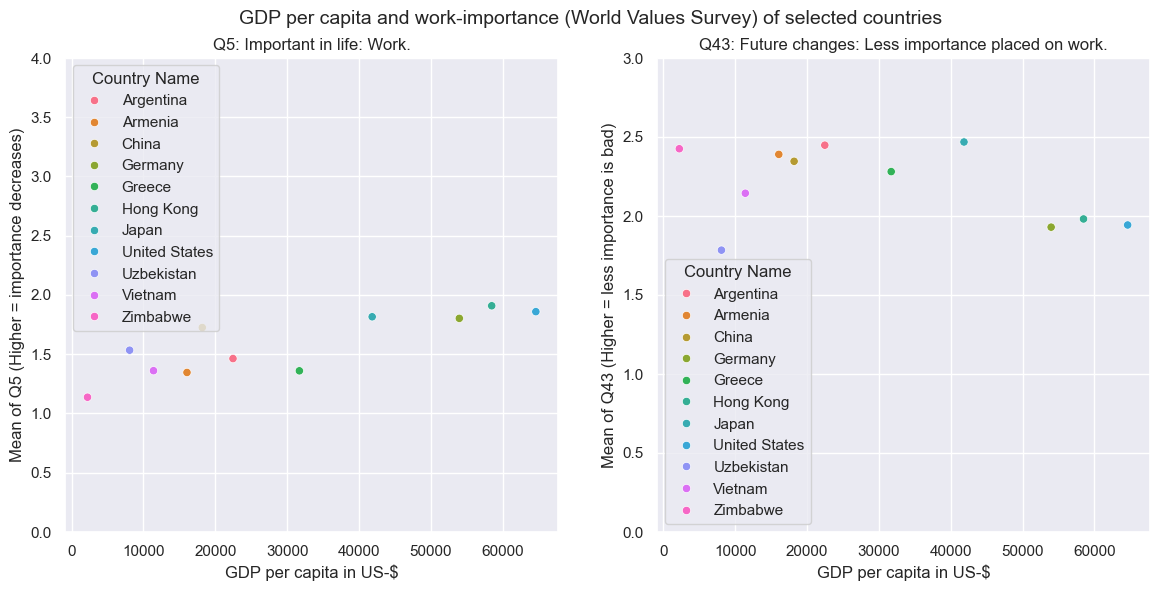

In [204]:
# Get unique values for hue because just using hue="country_name" will show all possible categeorical values,
# even though economy_analysis_df["country_name"].describe() shows it only has 11 unique values...
unique_country_names = economy_analysis_df["country_name"].unique()

fig, axs = plt.subplots(1,2, figsize=(14,6))
q5_plot = sns.scatterplot(x="gdp_per_capita",
            y="mean",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[0],
            #sizes=(40, 400),
            data=economy_analysis_df
)
q5_plot.set_ylim(bottom=0, top=4)
q5_plot.set_ylabel("Mean of Q5 (Higher = importance decreases)")
q5_plot.set_xlabel("GDP per capita in US-$")
q5_plot.set_title("Q5: Important in life: Work.")

q43_plot = sns.scatterplot(x="gdp_per_capita",
            y="mean_q43",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[1],
            #sizes=(40, 400),
            data=economy_analysis_df
)
q43_plot.set_ylim(bottom=0, top=3)
q43_plot.set_ylabel("Mean of Q43 (Higher = less importance is bad)")
q43_plot.set_xlabel("GDP per capita in US-$")
q43_plot.set_title("Q43: Future changes: Less importance placed on work.")

axs[0].legend(title="Country Name")
axs[1].legend(title="Country Name")

fig.suptitle('GDP per capita and work-importance (World Values Survey) of selected countries', fontsize=14)
fig.subplots_adjust(top=0.9)

plt.show()

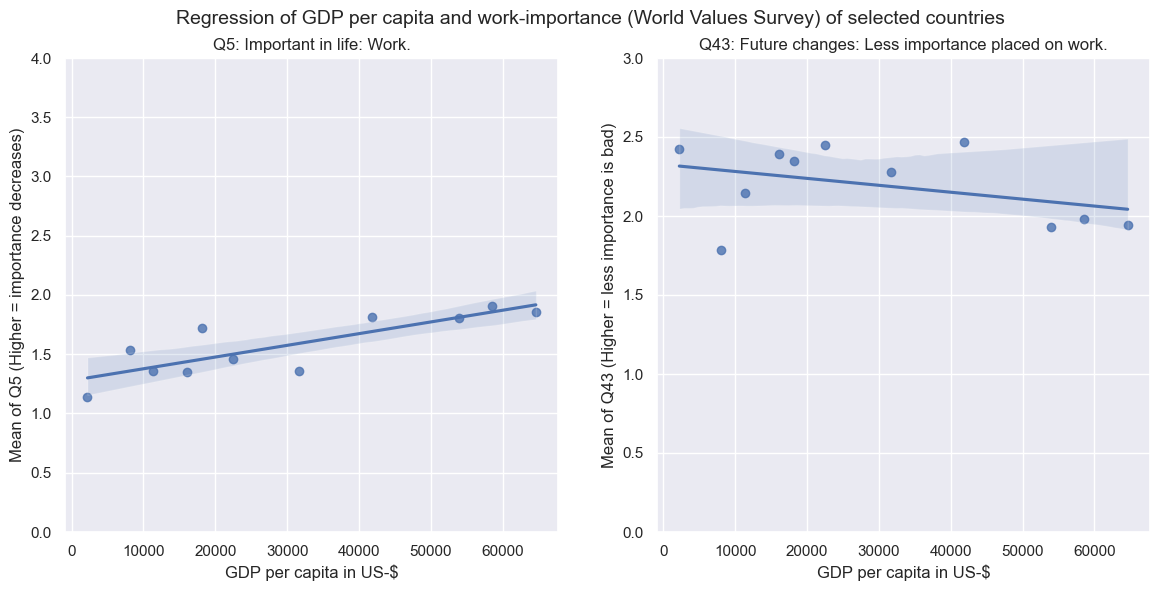

In [211]:
# REGRESSION: Plot GDP per capita against mean of Q5 and Q43
fig, axs = plt.subplots(1,2, figsize=(14,6))
q5_plot = sns.regplot(x="gdp_per_capita",
            y="mean",
            #hue="country_iso",
            ax=axs[0],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q5_plot.set_ylim(bottom=0, top=4)
q5_plot.set_ylabel("Mean of Q5 (Higher = importance decreases)")
q5_plot.set_xlabel("GDP per capita in US-$")
q5_plot.set_title("Q5: Important in life: Work.")

q43_plot = sns.regplot(x="gdp_per_capita",
            y="mean_q43",
            #hue="country_iso",
            ax=axs[1],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q43_plot.set_ylim(bottom=0, top=3)
q43_plot.set_ylabel("Mean of Q43 (Higher = less importance is bad)")
q43_plot.set_xlabel("GDP per capita in US-$")
q43_plot.set_title("Q43: Future changes: Less importance placed on work.")

fig.suptitle('Regression of GDP per capita and work-importance (World Values Survey) of selected countries', fontsize=14)
fig.subplots_adjust(top=0.9)

### 1.4) Verification of the Hypothesis
**Assumption:**

The higher a country's GDP per capita, the more importance is attached to work 1) today and 2) in the future.

This would mean: the higher a country's GDP per capita, 1) the lower the values for Q5 and 2) the higher the values for Q43.

**Actual result:**

🚧 1) Q5 - Assumption not approved: The higher a country's GDP per capita, the higher the values for Q5.

🚧 2) Q43 - Not approved: The higher a country's GDP per capita, the lower the values for Q43.
Caution: big 95%-confidence interval

Next step: evalute R^2-values for each plot to see whether there's an actual correlation.

***
## 2) Human Development Index

### 2.1) Relevant Questions: Q5 and Q43
- **Q5: Important in life: Work.**
    - Current view on the importance of work in the life of the respondent.
    - Possible answers: (1) Very important, (2) Rather important, (3) Not very important, (4) Not at all important
- **Q43: Future changes: Less importance placed on work.**
    - View on a decreasing importance of work in the life of the respondent.
    - Possible answers: (1) Good thing, (2) Don't mind, (3) Bad thing

### 2.2) Hypothesis
The higher a country's GDP per capita, the more importance is attached to work today and in the future.

This would mean: the higher a country's GDP per capita, the lower the values for Q5 and the higher the values for Q43.

### 2.3) Sources
Additional data used for [GDP data][1]:
- [World Bank (2023) – with minor processing by Our World in Data. “GDP per capita – World Bank – In constant 2017 international $” [dataset]. World Bank, “World Bank World Development Indicators” [original data]. Retrieved June 18, 2024 from https://ourworldindata.org/grapher/gdp-per-capita-worldbank][1]

[1]: https://ourworldindata.org/grapher/gdp-per-capita-worldbank